In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, r2_score)

# To print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display data to three deciaml places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To print all columns
pd.set_option('max_columns', None)

## load datasets

In [2]:
House_DF = pd.read_csv("../data/data.csv", encoding="CP949")

House_DF.info()
House_DF.shape

# 필요한 컬럼 : 단지명, 전용면적, 층, 계약년월, 계약일, 건축년도, 도로명
# test : 거래금액(만원)
# 불필요한 column 제거 : 시군구, 번지, 본번, 부번, 해제사유발생일, 거래유형, 중개사소재지 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       3825 non-null   object 
 1   번지        3825 non-null   object 
 2   본번        3825 non-null   int64  
 3   부번        3825 non-null   int64  
 4   단지명       3825 non-null   object 
 5   전용면적(㎡)   3825 non-null   float64
 6   계약년월      3825 non-null   int64  
 7   계약일       3825 non-null   int64  
 8   거래금액(만원)  3825 non-null   object 
 9   층         3825 non-null   int64  
 10  건축년도      3825 non-null   int64  
 11  도로명       3825 non-null   object 
 12  해제사유발생일   101 non-null    float64
 13  거래유형      3825 non-null   object 
 14  중개사소재지    3825 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 448.4+ KB


(3825, 15)

## 먼저 특수한 케이스를 나타내는 컬럼의 행 제거

In [3]:
print(House_DF['해제사유발생일'].unique())
print(House_DF['거래유형'].unique())
print(House_DF['중개사소재지'].unique())


[      nan 20210729. 20210209. 20210317. 20210927. 20211203. 20210510.
 20210415. 20210225. 20211123. 20211012. 20210430. 20210531. 20210330.
 20210405. 20210731. 20210818. 20210527. 20210511. 20210520. 20210621.
 20210903. 20210817. 20210708. 20210913. 20210924. 20210311. 20210730.
 20210910. 20210316. 20210726. 20210921. 20210604. 20210517. 20210319.
 20210914. 20210302. 20210308. 20210629. 20210806. 20210218. 20210608.
 20210427. 20210513. 20211006. 20210709. 20210504. 20211215. 20210208.
 20211117. 20210611. 20210526. 20210916. 20210707. 20210624. 20210222.
 20210429. 20211115. 20211015. 20211118. 20210202. 20211008. 20210830.
 20210906. 20211021. 20210811. 20210809. 20210622. 20210630. 20210503.
 20210901. 20211005. 20210512. 20211001. 20211130. 20211014. 20210423.
 20210614.]
['-' '중개거래']
['-' '서울 노원구']


In [4]:
indexNames1 = House_DF[ House_DF['해제사유발생일'] >= 1].index
House_DF.drop(indexNames1, inplace=True)
House_DF.shape

indexNames2 = House_DF[ House_DF['거래유형'] == '중개거래'].index
House_DF.drop(indexNames2, inplace=True)
House_DF.shape

# check
print(House_DF['해제사유발생일'].unique())
print(House_DF['거래유형'].unique())
print(House_DF['중개사소재지'].unique())

(3724, 15)

(3721, 15)

[nan]
['-']
['-']


## 불필요한 컬럼 제거

In [5]:
House_DF = House_DF.drop(["시군구", "번지", "본번", "부번", "계약일", "해제사유발생일",
                "거래유형", "중개사소재지"], axis=1)



House_DF.head()

,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,6.7디벨리움,17.270,202107,"17,900",15,2016,화랑로 443
1,6.7디벨리움,28.670,202107,"22,000",17,2016,화랑로 443
2,6.7디벨리움,17.270,202108,"17,000",11,2016,화랑로 443
3,건영아파트,59.940,202108,"57,500",11,1998,동일로173가길 145
4,건영아파트,59.940,202110,"59,000",12,1998,동일로173가길 145


In [6]:
#계약년월 + 계약일 합치는 부분인데, 불필요해 보임. 나중에 지우기!

# House_data["계약일"] = House_data["계약년월"].map(str) + "" + House_data["계약일"].apply(str)

# House_data = House_data.drop(["계약년월"], axis=1)

# # type 변경 : object -> datetime
# House_data["계약일"] = pd.to_datetime(House_data["계약일"], format='%Y%m%d')

# House_DF = House_data.drop(["계약일"], axis=1)

In [7]:
# 컬럼 순서 변경
House_DF = House_DF[['도로명', '단지명', '전용면적(㎡)' ,'층', '계약년월', '건축년도', '거래금액(만원)']]


House_DF = House_DF.drop(["도로명", "단지명"], axis=1)
# 이부분 잠시 추가
# House_data = House_data.drop(['도로명', '단지명', '계약일'], axis=1)

# '거래금액(만원)' : 변환 전 ',' 제거 + object -> int type 변경
House_DF["거래금액(만원)"] = pd.to_numeric(House_DF["거래금액(만원)"].str.replace(',', ''))


House_DF.info()
House_DF.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3721 entries, 0 to 3824
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   전용면적(㎡)   3721 non-null   float64
 1   층         3721 non-null   int64  
 2   계약년월      3721 non-null   int64  
 3   건축년도      3721 non-null   int64  
 4   거래금액(만원)  3721 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 174.4 KB


,전용면적(㎡),층,계약년월,건축년도,거래금액(만원)
0,17.270,15,202107,2016,17900
1,28.670,17,202107,2016,22000
2,17.270,11,202108,2016,17000


<AxesSubplot:xlabel='전용면적(㎡)', ylabel='거래금액(만원)'>

<AxesSubplot:xlabel='층', ylabel='거래금액(만원)'>

<AxesSubplot:xlabel='계약년월', ylabel='거래금액(만원)'>

<AxesSubplot:xlabel='건축년도', ylabel='거래금액(만원)'>

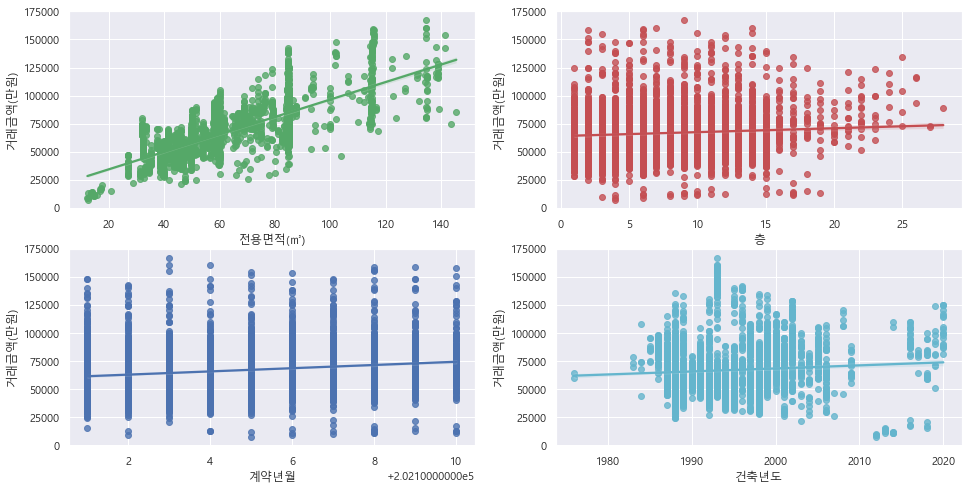

In [8]:
# seaborn에서 한글 깨짐 수정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig, axs = plt.subplots(figsize = (16, 8), ncols = 2, nrows = 2)
lm_features = ['전용면적(㎡)' ,'층', '계약년월', '건축년도']
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue' ]
for i , feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='거래금액(만원)',data=House_DF , ax=axs[row][col], color=colors[i])
    



## 학습과 테스트 데이터 세트를 분리하고 학습/예측/평가 수행

In [9]:
y_target = House_DF['거래금액(만원)']
x_data = House_DF.drop(['거래금액(만원)'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 156)

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(mse, rmse)


LinearRegression()

176076349.9357676 13269.376395888678


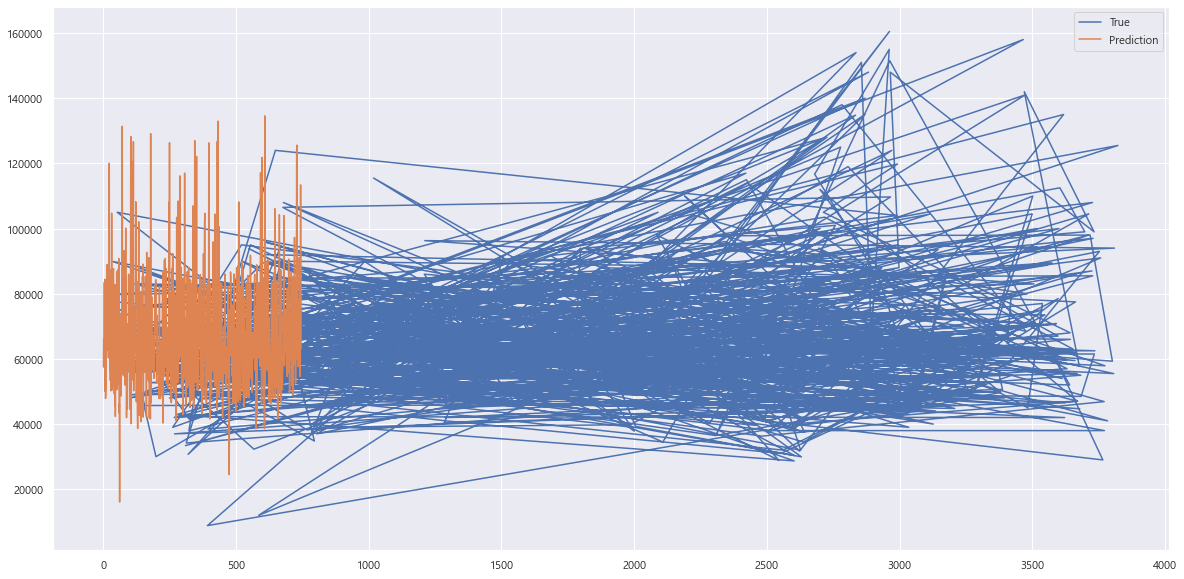

In [11]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax2 = fig.add_subplot(111)
ax2.plot(y_test, label='True')
ax2.plot(y_predict, label='Prediction')
ax2.legend()
plt.show()